In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from collections import Counter, defaultdict
import matplotlib

from sklearn.cluster import KMeans

In [58]:
iris=datasets.load_iris()

In [59]:
print(iris.data) # 数据集中的数据
print(iris.target) #  iris的种类

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [60]:
iris = pd.DataFrame(iris.data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'])
iris.shape
iris.head()

,花萼长度,花萼宽度,花瓣长度,花瓣宽度
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   花萼长度    150 non-null    float64
 1   花萼宽度    150 non-null    float64
 2   花瓣长度    150 non-null    float64
 3   花瓣宽度    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(150, 2)


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


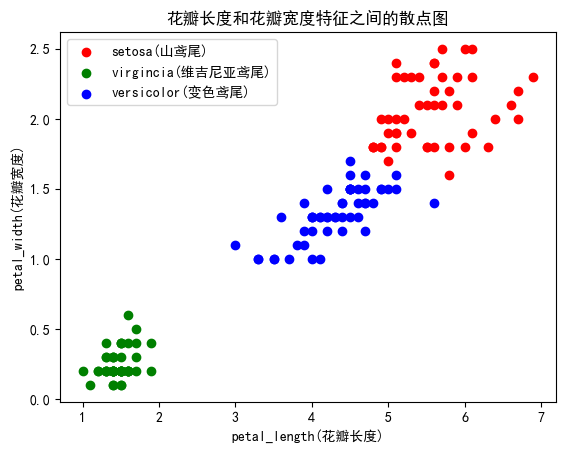

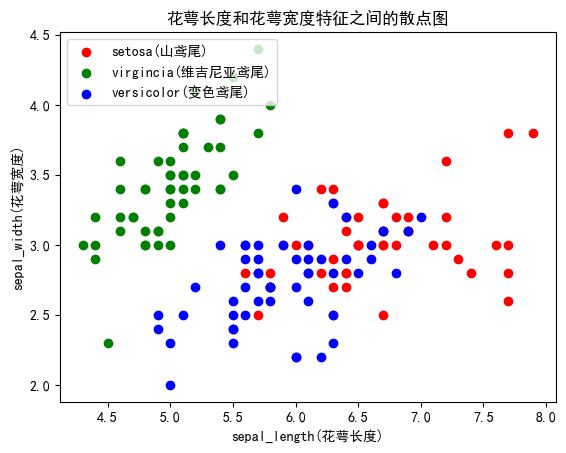

In [71]:
huaban=iris[['花瓣长度','花瓣宽度']]
print(huaban.shape)#这里看一下有没有数据缺失
plt.rcParams['font.sans-serif']=['SimHei']
estimator = KMeans(n_clusters=3,n_init='auto')#构造聚类器
estimator.fit(X)#聚类
label_pred=estimator.labels_#获取聚类标签
a0=huaban[label_pred==0]#对应setosa
a1=huaban[label_pred==1]#对应vigincia
a2=huaban[label_pred==2]#对应versicolor
plt.scatter(a0.values[:,0],a0.values[:,1],c='r',marker='o',label='setosa(山鸢尾)')
plt.scatter(a1.values[:,0],a1.values[:,1],c='g',marker='o',label='virgincia(维吉尼亚鸢尾)')
plt.scatter(a2.values[:,0],a2.values[:,1],c='blue',marker='o',label='versicolor(变色鸢尾)')
plt.xlabel('petal_length(花瓣长度)')
plt.ylabel('petal_width(花瓣宽度)')
plt.title('花瓣长度和花瓣宽度特征之间的散点图')
plt.legend(loc=2)#把图例放到左上角
plt.show()
#-----------------------------------#
huaer=iris[['花萼长度','花萼宽度']] 
b0=huaer[label_pred==0]#对应setosa
b1=huaer[label_pred==1]#对应vigincia
b2=huaer[label_pred==2]#对应versicolor
plt.scatter(b0.values[:,0],b0.values[:,1],c='r',marker='o',label='setosa(山鸢尾)')
plt.scatter(b1.values[:,0],b1.values[:,1],c='g',marker='o',label='virgincia(维吉尼亚鸢尾)')
plt.scatter(b2.values[:,0],b2.values[:,1],c='blue',marker='o',label='versicolor(变色鸢尾)')
plt.xlabel('sepal_length(花萼长度)')
plt.ylabel('sepal_width(花萼宽度)')
plt.title('花萼长度和花萼宽度特征之间的散点图')
plt.legend(loc=2)#把图例放到左上角
plt.show()

In [3]:
#每行的数据，一共四列，每一列映射为feature中对应的值
X=iris.data
#每行数据对应的分类结果值（也就是每行数据的label值）,取值为[0,1,2]
Y=iris.target
#归一化处理
X = X[:, -2:] 
X = StandardScaler().fit_transform(X)

In [4]:
lr = LogisticRegression()   # Logistic回归模型
lr.fit(X, Y)        # 根据数据[x,y]，计算回归参数


LogisticRegression()

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


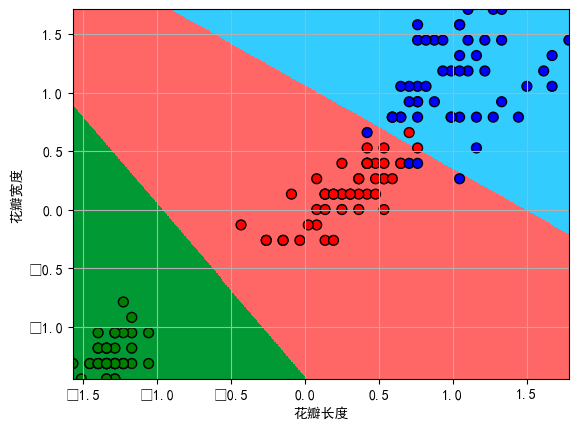

In [74]:
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()   # 第0列的范围
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

cm_light = mpl.colors.ListedColormap(['#009933', '#ff6666', '#33ccff'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)       # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors='k', s=50, cmap=cm_dark)    
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()

In [6]:
y_hat = lr.predict(X)
Y = Y.reshape(-1)
result = y_hat == Y
print(y_hat)
print(result)
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True 